In [2]:
import pandas as pd

# Load the CSV file to inspect the content
file_path = './cygnus_sinwave.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,code,Unnamed: 1,cygnus
0,-140156.2113,NaN,165521.95
1,-134657.3245,NaN,121165.71
2,-128618.2855,NaN,72624.69
3,-121064.6476,NaN,17987.12
4,-105322.7610,NaN,-41053.61


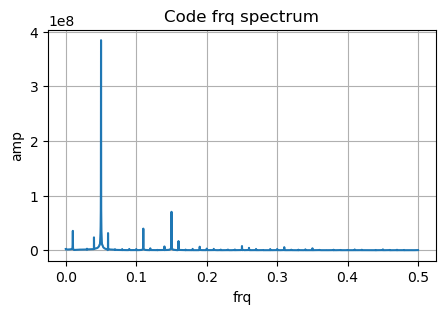

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
code_data = data['code'].dropna().values

code_fft = fft(code_data)

n = len(code_data)
frequencies = np.fft.fftfreq(n)

plt.figure(figsize=(5, 3))
plt.plot(frequencies[:n//2], np.abs(code_fft[:n//2]))
plt.title("Code frq spectrum")
plt.xlabel("frq")
plt.ylabel("amp")
plt.grid(True)
plt.show()


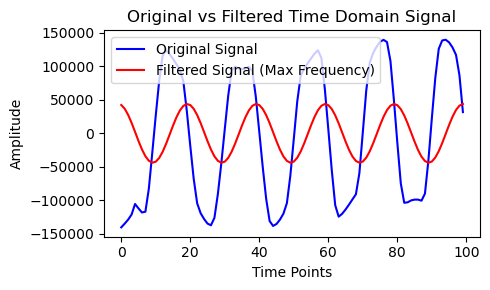

In [12]:
from scipy.fft import ifft
magnitude = np.abs(code_fft)
max_index = np.argmax(magnitude)
filtered_fft = np.zeros_like(code_fft)
filtered_fft[max_index] = code_fft[max_index]
filtered_data = ifft(filtered_fft)
plt.figure(figsize=(5, 3))

plt.plot(code_data[:100], label="Original Signal", color="blue")

plt.plot(filtered_data.real[:100], label="Filtered Signal (Max Frequency)", color="red")

plt.title("Original vs Filtered Time Domain Signal")
plt.xlabel("Time Points")
plt.ylabel("Amplitude")

plt.legend()

plt.tight_layout()
plt.show()

$$Filter:$$
$$% Low-pass filter difference equation
y[n] = \sum_{i=0}^{N} b_i \cdot x[n-i] - \sum_{j=1}^{N} a_j \cdot y[n-j]$$

$$
% Mean and Standard Deviation for both filtered_code and cygnus
\mu_{\text{filtered\_code}} = \text{Mean of filtered\_code}
\quad
\sigma_{\text{filtered\_code}} = \text{Standard deviation of filtered\_code}
$$

$$
\mu_{\text{cygnus}} = \text{Mean of cygnus}
\quad
\sigma_{\text{cygnus}} = \text{Standard deviation of cygnus}
$$
$$
% Scaling equation
\text{scaled\_filtered\_code} = \left( \text{filtered\_code} - \mu_{\text{filtered\_code}} \right) \times \left( \frac{\sigma_{\text{cygnus}}}{\sigma_{\text{filtered\_code}}} \right) + \mu_{\text{cygnus}}
$$

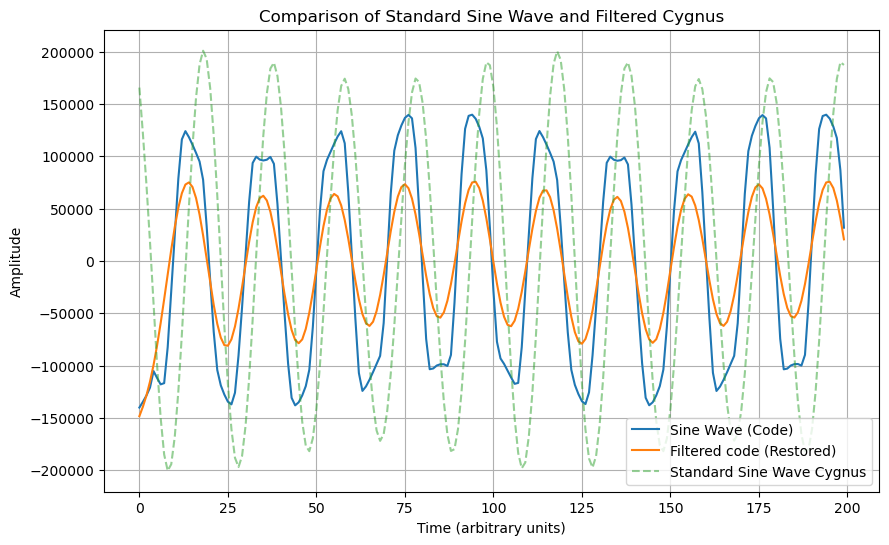

In [11]:
from scipy.signal import butter, filtfilt

# Remove the unnecessary column
data_cleaned = data[['code', 'cygnus']].dropna()

# Normalize time based on the index (assuming uniform sampling)
time = np.arange(len(data_cleaned))

# Define a low-pass filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter parameters
cutoff_frequency = 0.05  # Adjust this for better results if needed
sampling_rate = 1  # Assuming equal time intervals in the data

# Apply the low-pass filter to cygnus data
filtered_code = butter_lowpass_filter(data_cleaned['code'], cutoff_frequency, sampling_rate)

# Plot one period of the wave
plt.figure(figsize=(10, 6))
range = 200
plt.plot(time[:range], data_cleaned['code'][:range], label='Sine Wave (Code)')
plt.plot(time[:range], filtered_code[:range], label='Filtered code (Restored)')
plt.plot(time[:range], data_cleaned['cygnus'][:range], label='Standard Sine Wave Cygnus', alpha=0.5, linestyle='--')

# Add titles and labels
plt.title('Comparison of Standard Sine Wave and Filtered Cygnus')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [13]:
mean_filtered_code = np.mean(filtered_code)
std_filtered_code = np.std(filtered_code)
mean_cygnus = np.mean(data_cleaned['cygnus'])
std_cygnus = np.std(data_cleaned['cygnus'])

scaled_filtered_code = (filtered_code - mean_filtered_code) * (std_cygnus / std_filtered_code) + mean_cygnus

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

range_limit = 100

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) between filtered and standard signal
mse = mean_squared_error(data_cleaned['cygnus'][:range_limit], filtered_code[:range_limit])
mae = mean_absolute_error(data_cleaned['cygnus'][:range_limit], filtered_code[:range_limit])

# Calculate the Pearson correlation coefficient
correlation, _ = pearsonr(data_cleaned['cygnus'][:range_limit], filtered_code[:range_limit])

# Display the results
mse, mae, correlation

(15416138004.291327, 109379.10582212578, 0.34638871538960764)

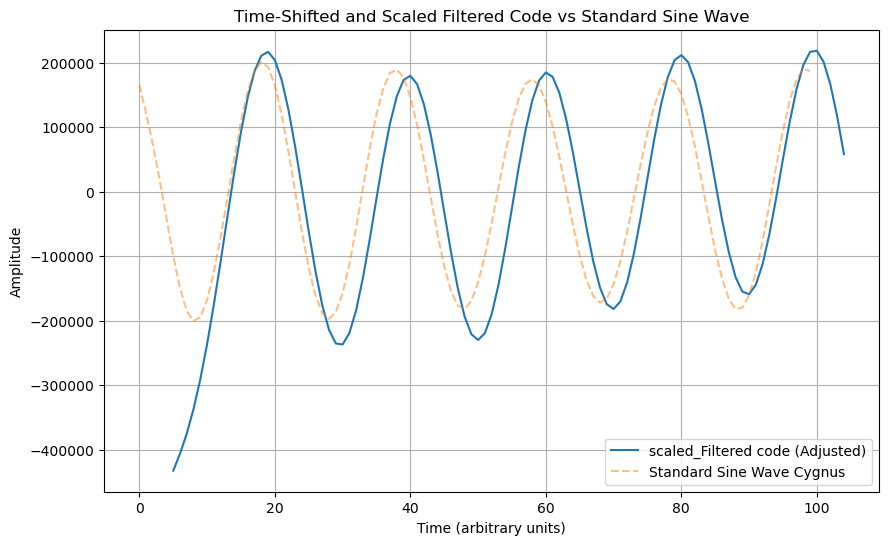

In [16]:
# To shift only in the plot, we can adjust the time axis without changing the data

# Define a phase shift (in data points)
phase_shift_points = 5  # Shift by 5 points on the time axis

# Adjust the time axis for the filtered signal without shifting the data
time_shifted = time[:range_limit] + phase_shift_points

# Plot the shifted time axis for the filtered signal
plt.figure(figsize=(10, 6))
plt.plot(time_shifted, scaled_filtered_code[:range_limit], label='scaled_Filtered code (Adjusted)')
plt.plot(time[:range_limit], data_cleaned['cygnus'][:range_limit], label='Standard Sine Wave Cygnus', alpha=0.5, linestyle='--')

# Add titles and labels
plt.title('Time-Shifted and Scaled Filtered Code vs Standard Sine Wave')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


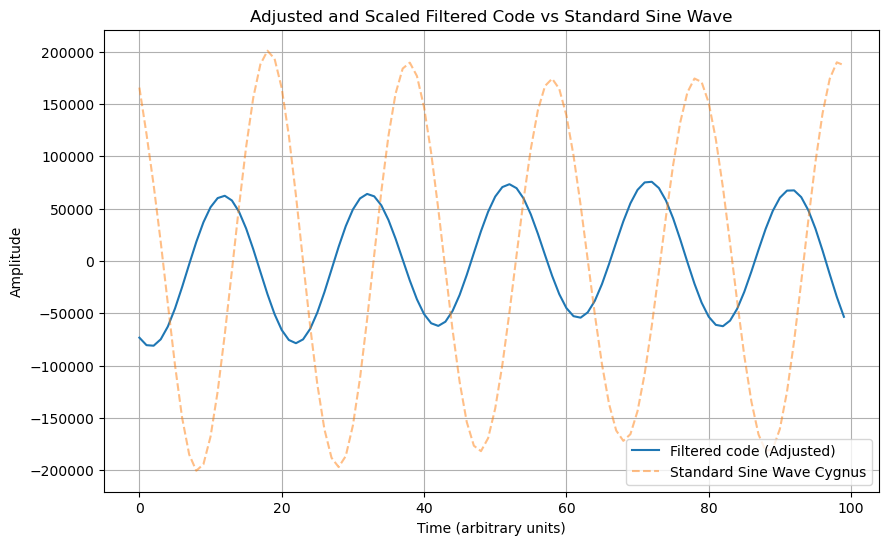

In [10]:
# Here we can apply a basic shift to minimize the difference
phase_shift = 23  # This is a basic assumption; can be fine-tuned
filtered_code_final = np.roll(filtered_code, -phase_shift)

# Plot the adjusted and scaled filtered signal against the standard sine wave
plt.figure(figsize=(10, 6))
plt.plot(time[:range_limit], filtered_code_final[:range_limit], label='Filtered code (Adjusted)')
plt.plot(time[:range_limit], data_cleaned['cygnus'][:range_limit], label='Standard Sine Wave Cygnus', alpha=0.5, linestyle='--')

# Add titles and labels
plt.title('Adjusted and Scaled Filtered Code vs Standard Sine Wave')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()